## Ejercicio 2 — Ojos Digitales (Filtros y Bordes con OpenCV)

### Cargamos la imagen dentro del colab

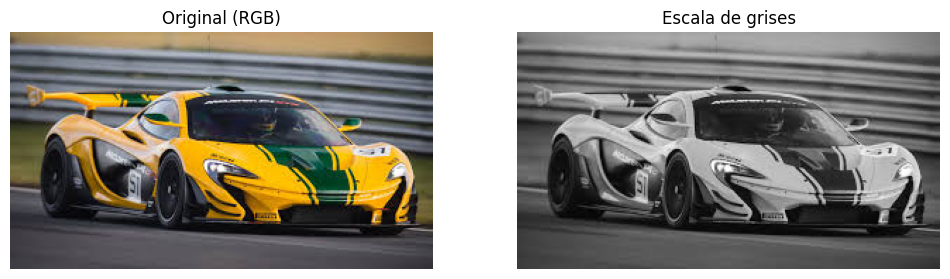

In [1]:
import cv2
from matplotlib import pyplot as plt

# Ruta a la imagen
img_path = '/content/P1Senna.jpg'

# Cargar en BGR (OpenCV)
bgr = cv2.imread(img_path)
if bgr is None:
    raise FileNotFoundError(f"No se encontró '{img_path}'. Sube la imagen o corrige la ruta.")

# Convertir a RGB para mostrar con matplotlib
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# Convertir a escala de grises --> gray
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# Mostrar lado a lado
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.title('Original (RGB)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title('Escala de grises')
plt.axis('off')
plt.show()


### blur/sharpen

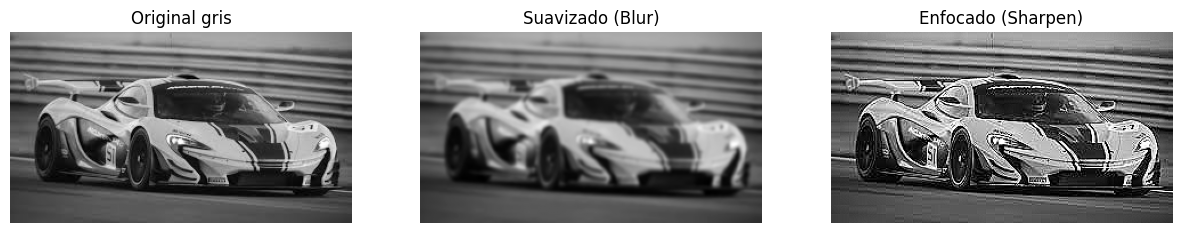

In [9]:
import numpy as np

# --- Filtro Blur (suavizado) ---
blur = cv2.GaussianBlur(gray, (7, 7), 0)  # kernel 7x7

# --- Filtro Sharpen (enfocado) ---
# Definimos un kernel de realce
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpen = cv2.filter2D(gray, -1, kernel_sharpen)

# --- Mostrar resultados ---
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title('Original gris')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(blur, cmap='gray')
plt.title('Suavizado (Blur)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sharpen, cmap='gray')
plt.title('Enfocado (Sharpen)')
plt.axis('off')

plt.show()


### Sobel X/Y

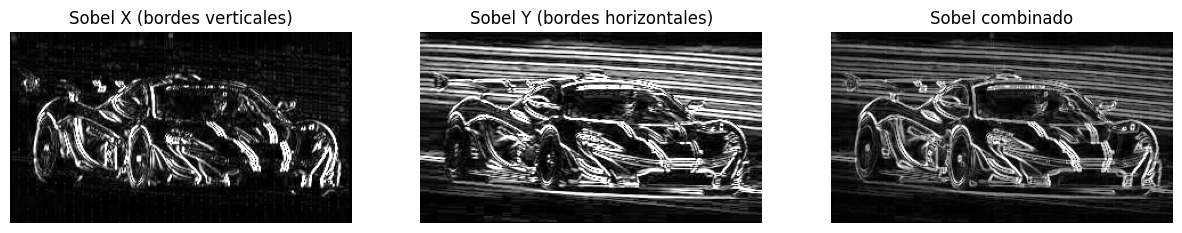

In [10]:
# --- Filtros Sobel ---
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Bordes horizontales
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Bordes verticales

# Convertir a valores absolutos y tipo uint8 para mostrar
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)

# Combinación de ambos (opcional)
sobel_combined = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# --- Mostrar resultados ---
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X (bordes verticales)')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y (bordes horizontales)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel combinado')
plt.axis('off')
plt.show()


### Filtro Laplaciano

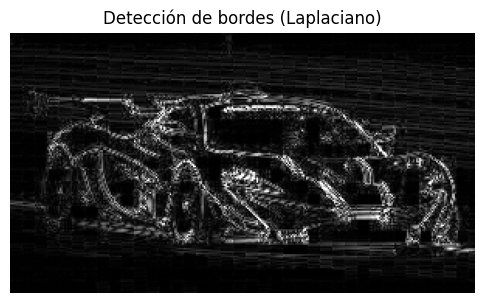

In [11]:
# --- Filtro Laplaciano ---
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# --- Mostrar ---
plt.figure(figsize=(6,6))
plt.imshow(laplacian, cmap='gray')
plt.title('Detección de bordes (Laplaciano)')
plt.axis('off')
plt.show()

